In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
img = cv2.imread("Computer-Vision-with-Python\DATA\sammy.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

noisy = cv2.imread("Computer-Vision-with-Python\DATA\sammy_noise.jpg")
noisy = cv2.cvtColor(noisy,cv2.COLOR_BGR2RGB)

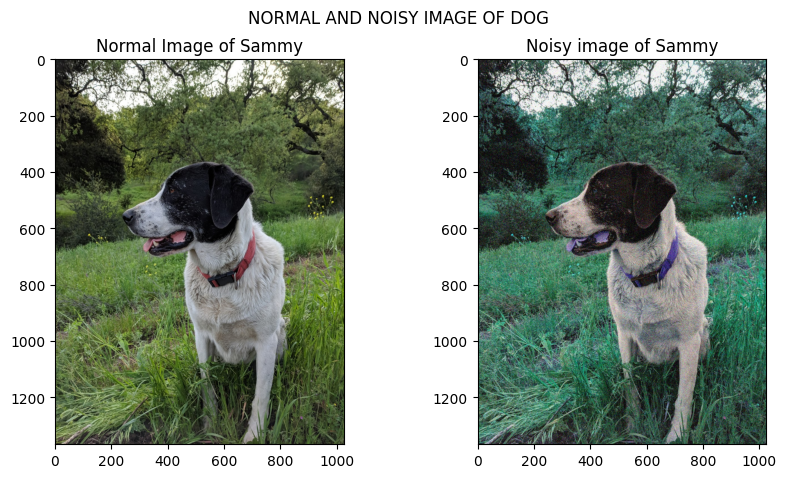

In [4]:
plt.figure(1,(10,5))
plt.suptitle("NORMAL AND NOISY IMAGE OF DOG")
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Normal Image of Sammy")
plt.subplot(122)
plt.imshow(noisy)
plt.title("Noisy image of Sammy")
plt.show()

# To know about the process of Canny Edge detection algorithm, it's better to refer to the actual paper at 

https://en.wikipedia.org/wiki/Canny_edge_detector

# The basic outline of how this algorithm works is

1. Adds Gaussian Blur to remove noise from the images inorder for relevant edge detection.
2. Finds the intensity gradients of image
3. Applies non - maximum suppression to get rid of spurious response to edge detection
4. Applies double threshold to determine potential edges
5. Tracks the edges at last by hysteresis by suppressing weak edges and connecting to strong edges


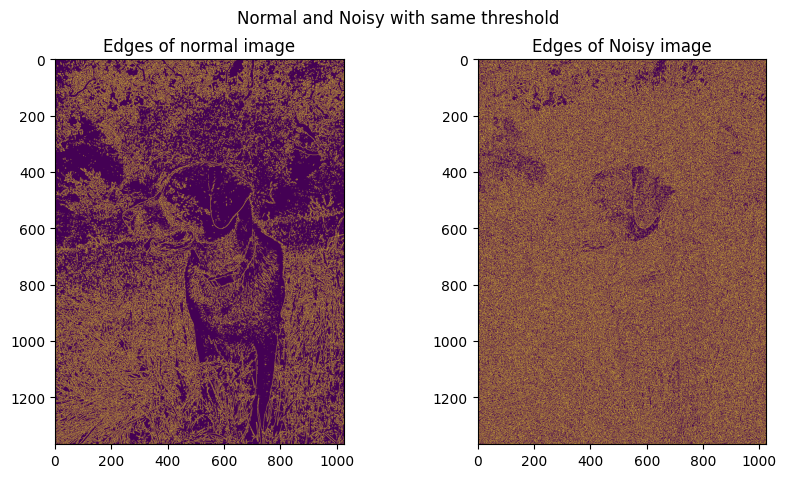

In [5]:
edges1 = cv2.Canny(img,threshold1 = 127, threshold2= 127)
edges2 = cv2.Canny(noisy,threshold1 = 127, threshold2= 127)


plt.figure(1,(10,5))
plt.suptitle("Normal and Noisy with same threshold")
plt.subplot(1,2,1)
plt.imshow(edges1)
plt.title("Edges of normal image")
plt.subplot(122)
plt.imshow(edges2)
plt.title("Edges of Noisy image")
plt.show()

This is the reason why noise is removed first using gaussian blur filter by the canny edge detecton

###  Let's try changing thresholds to circle around meridian of the pixel values of image ###

In [18]:
lower_img = int(max(0, 0.8 *np.median(img))) # Threshold1, either near to 30% less than the median or 0
upper_img = int(min(255, 1.1 * np.median(img))) # Threshold 2, either near to 30% more than median or directly to 255

In [19]:
lower_noisy = max(0, 0.8 *(np.median(noisy)//2)) # Threshold1, either near to 30% less than the median or 0
upper_noisy = min(255, 1.1 * (np.median(noisy)//2)) # Threshold 2, either near to 30% more than median or directly to 255

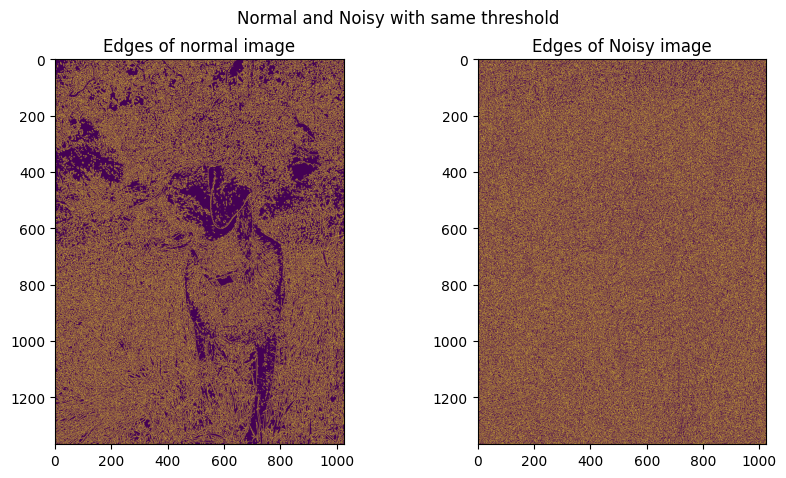

In [20]:
edges1 = cv2.Canny(img,threshold1 = lower_img, threshold2= upper_img)
edges2 = cv2.Canny(noisy,threshold1 = lower_noisy, threshold2= upper_noisy)


plt.figure(1,(10,5))
plt.suptitle("Normal and Noisy with same threshold")
plt.subplot(1,2,1)
plt.imshow(edges1)
plt.title("Edges of normal image")
plt.subplot(122)
plt.imshow(edges2)
plt.title("Edges of Noisy image")
plt.show()

Since this is not enough but what if we apply the blur by ourself first and then try again.

In [29]:
img_blur = cv2.blur(img,(3,3))
noisy_blur = cv2.blur(noisy,(3,3))

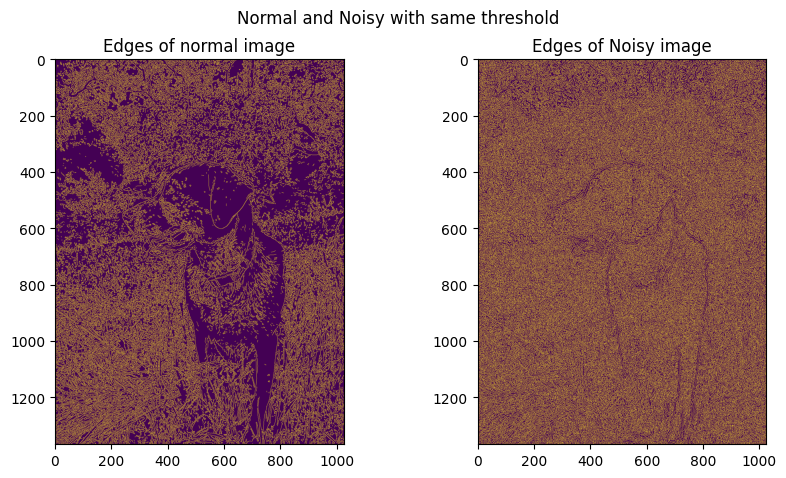

In [30]:
edges1 = cv2.Canny(img_blur,threshold1 = lower_img, threshold2= upper_img)
edges2 = cv2.Canny(noisy_blur,threshold1 = lower_noisy, threshold2= upper_noisy)


plt.figure(1,(10,5))
plt.suptitle("Normal and Noisy with same threshold")
plt.subplot(1,2,1)
plt.imshow(edges1)
plt.title("Edges of normal image")
plt.subplot(122)
plt.imshow(edges2)
plt.title("Edges of Noisy image")
plt.show()

# Let's go a step further and apply the blur on both the images for multiple times and let canny detect edges in highly blurred and less noisy images

In [31]:
x = img
y = noisy
for i in range(10):  # A loop to blur the images for multiple iterations. Here, 10 iterations

    x = cv2.blur(x,(3,3))
    y = cv2.blur(y,(3,3))

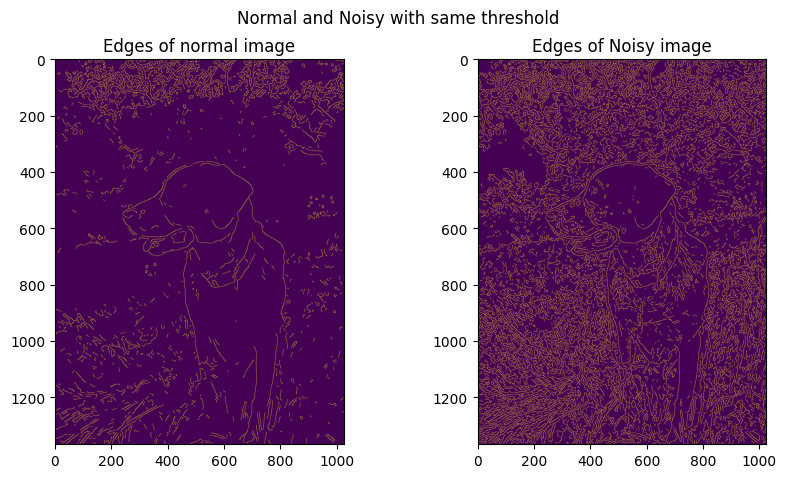

In [32]:
# Running canny on these higly blurred images
edges1 = cv2.Canny(x ,threshold1 = lower_img, threshold2= upper_img)
edges2 = cv2.Canny(y ,threshold1 = lower_noisy, threshold2= upper_noisy)


plt.figure(1,(10,5))
plt.suptitle("Normal and Noisy with same threshold")
plt.subplot(1,2,1)
plt.imshow(edges1)
plt.title("Edges of normal image")
plt.subplot(122)
plt.imshow(edges2)
plt.title("Edges of Noisy image")
plt.show()

# Now when the images are blurred enough and the noise is reduced to very low, then the strong edges are now more clearly visible